# Prediction of Appointment No-Show using Classification Models

Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. we will prediction if the person shows up or not using a few classitfication algorithms.

In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_appointments = pd.read_csv('Data/appointment.csv')
df_appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


# EDA

In [3]:
df_appointments.shape

(110527, 14)

In [4]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No     0.798067
Yes    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

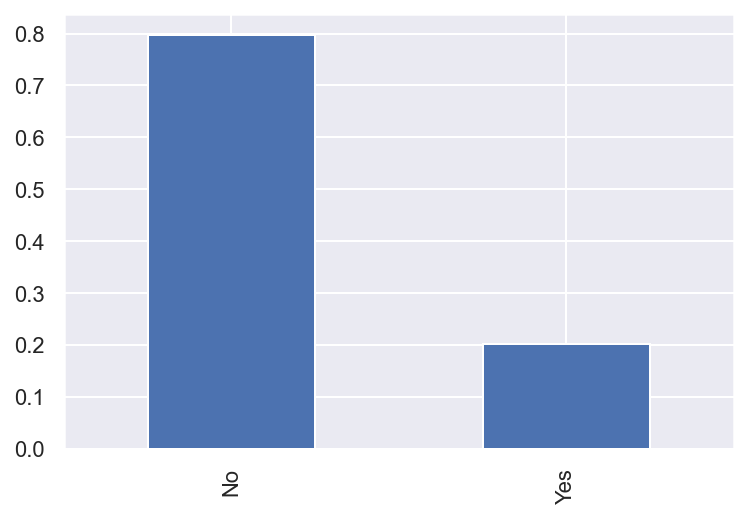

In [5]:
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [6]:
df_appointments['No-show'] = df_appointments['No-show'].str.replace('No', '1')
df_appointments['No-show'] = df_appointments['No-show'].str.replace('Yes', '0')
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [7]:
df_appointments['Gender'] = df_appointments['Gender'].str.replace('M', '1')
df_appointments['Gender'] = df_appointments['Gender'].str.replace('F', '0')
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,0,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


1    0.798067
0    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

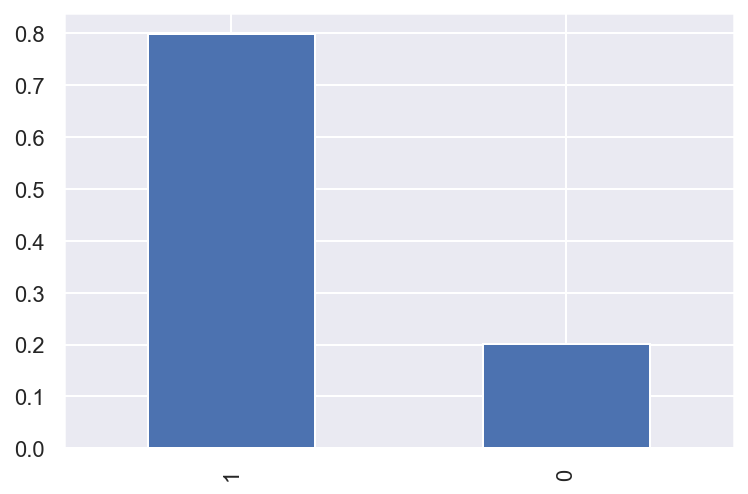

In [8]:
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [9]:
df_appointments.ScheduledDay=df_appointments.loc[:].ScheduledDay.map(lambda x: str.split(x, "T")[0])
df_appointments.AppointmentDay=df_appointments.loc[:].AppointmentDay.map(lambda x: str.split(x, "T")[0])

In [10]:
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay'])
df_appointments['AppointmentDay'] = pd.to_datetime(df_appointments['AppointmentDay'])

In [11]:
from datetime import date
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay'] 
df_appointments['days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: days, Length: 110527, dtype: timedelta64[ns]

In [12]:
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay']
df_appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,5.589980e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,4.262960e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,8.679510e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,8.841190e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35 days
110523,3.596270e+12,5650093,0,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35 days
110524,1.557660e+13,5630692,0,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41 days
110525,9.213490e+13,5630323,0,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41 days


In [13]:
df_appointments = df_appointments.drop(['Neighbourhood'], axis = 1)
df_appointments = df_appointments.drop(['AppointmentDay'], axis = 1)
df_appointments = df_appointments.drop(['ScheduledDay'], axis = 1)

In [14]:
df_appointments

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,1,0 days
1,5.589980e+14,5642503,1,56,0,0,0,0,0,0,1,0 days
2,4.262960e+12,5642549,0,62,0,0,0,0,0,0,1,0 days
3,8.679510e+11,5642828,0,8,0,0,0,0,0,0,1,0 days
4,8.841190e+12,5642494,0,56,0,1,1,0,0,0,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,0,1,1,35 days
110523,3.596270e+12,5650093,0,51,0,0,0,0,0,1,1,35 days
110524,1.557660e+13,5630692,0,21,0,0,0,0,0,1,1,41 days
110525,9.213490e+13,5630323,0,38,0,0,0,0,0,1,1,41 days


In [15]:
# convert delta date to int
df_appointments['days'] = (df_appointments.days / np.timedelta64(1,'D')).astype(int)

In [16]:
df_appointments['Gender']=df_appointments['Gender'].astype('int') 
df_appointments['No-show']= df_appointments['No-show'].astype('int') 

# Split the data

In [17]:
X = df_appointments.drop(['No-show'], axis = 1)
y = df_appointments['No-show']
#y =pd.DataFrame(y)
y

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110527, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

# validatipon =0.5

In [19]:
X_train

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,days
87048,8.154550e+12,5537653,0,49,0,0,0,0,0,1,63
4831,6.132610e+13,5646633,0,14,0,0,0,0,0,0,2
29699,4.482370e+11,5648948,1,1,0,0,0,0,0,0,7
25783,5.887940e+13,5667456,1,2,0,0,0,0,0,1,4
13020,6.767350e+12,5500310,0,50,0,0,0,0,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...
76820,4.876250e+11,5664593,0,63,0,1,1,0,0,1,5
110268,3.911650e+12,5622779,1,31,0,0,0,0,0,0,36
103694,4.973440e+11,5762864,0,38,0,0,0,0,0,0,6
860,2.623490e+14,5639951,0,18,1,0,0,0,0,0,0


# Baseline before Over Sambling

In [20]:
lm1 = LogisticRegression() 
lm1.fit(X_train, y_train)

LogisticRegression()

In [21]:
lm1.score(X_train, y_train)

0.7979974666747089

In [22]:
lm1.score(X_test, y_test)

0.7986971862842667

# Handling The Class Imbalance Struggle (With Instacart Data)

In [23]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({1: 79380, 0: 20094})
After oversampling:  Counter({1: 79380, 0: 79380})


0    0.5
1    0.5
Name: No-show, dtype: float64


<AxesSubplot:>

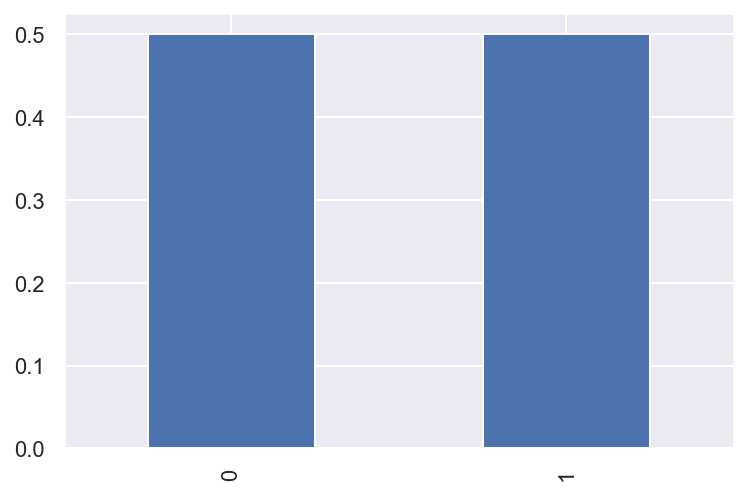

In [24]:
# ترسم التارقت واشوف بالانس او لا 
target_show = y_train_SMOTE.value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

# Baseline after Over Sambling

In [25]:
lm2 = LogisticRegression() 
lm2.fit(X_train, y_train)

LogisticRegression()

In [26]:
lm2.score(X_train_SMOTE, y_train_SMOTE)

0.5

In [27]:
lm2.score(X_test, y_test)

0.7986971862842667

# Instantiate four models

In [28]:
from sklearn import linear_model, neighbors, ensemble
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

from mlxtend.classifier import StackingClassifier

In [29]:
lr_model = linear_model.LogisticRegression(solver="lbfgs", random_state=1)
knn_model = neighbors.KNeighborsClassifier()
rf_model = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)#  100 مية شجرة 
et_model = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1) # ExtraTreesClassifier يستعمل كل الراندوم 

models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [ ]:
for model_name in models:
    
    curr_model = eval(model_name) # تاخذ المودل وتحوله لاوبجكت 
    
    curr_model.fit(X_train, y_train)
    
   # with open(f"models/{model_name}.pickle", "wb") as pfile:
        #pickle.dump(curr_model, pfile)

In [ ]:
# Load pre-trained/tuned models

model_names = ["lr_model", "knn_model", "rf_model", "et_model"]

"""
for model_name in model_names:
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")
        
"""

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [ ]:
model_list

In [ ]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

# Max Voting (hard)

In [ ]:
# create voting classifier  voting_classifer = يطلع الماجورتي ويقرر الواي هات اذا صفر او واحد ويقارنها بالواي تست
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1) # شغل كل الاتريبيوت
voting_classifer.fit(X_train, y_train)


In [ ]:
# get accuracy (model to beat: RF with 0.7992852619198407 accuracy)
from sklearn.metrics import accuracy_score

y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

# Average Voting (soft)

In [ ]:
# create voting classifier
weights = [1.5,3.8,4.2,2.2]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

In [ ]:
# Get accuracy (model to beat: RF with 0.7976567447751741 accuracy)
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Weighted Voting

In [ ]:
weights = [2.5,1200,1200,8]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

In [ ]:
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)